In [3]:
import pandas as pd
import os

In [17]:
countries = ['HU', 'IT', 'PO', 'SP', 'UK', 'DE', 'DK', 'SE', 'NE']
cn = countries[0]
folder = os.path.join('data', 'raw_data')

In [18]:
def load_data(file_path):
    # TODO: Load data from CSV file
    df = pd.read_csv(file_path)
    return df

In [19]:


def get_generation_files(country, data_folder):
    files = os.listdir(data_folder)
    gen_file_list = [file for file in files if file.startswith(f'gen_{country}')]
    return gen_file_list

# print(countries)
generation_files = get_generation_files(cn, folder)
generation_files


['gen_HU_B01.csv',
 'gen_HU_B09.csv',
 'gen_HU_B11.csv',
 'gen_HU_B12.csv',
 'gen_HU_B14.csv',
 'gen_HU_B15.csv',
 'gen_HU_B16.csv',
 'gen_HU_B17.csv',
 'gen_HU_B19.csv',
 'gen_HU_B20.csv']

In [20]:
def get_load_file(country, data_folder):
    files = os.listdir(data_folder)
    for file in files:
        if file.startswith(f'load_{country}'):
            return file
        
load_file = get_load_file(cn, folder)
load_file

'load_HU.csv'

In [23]:

generation_files = get_generation_files(cn, folder)

print(countries)

for i, country in countries:
    print(country)
    load_file = get_load_file(country, folder)
    load_df = pd.read_csv(os.path.join(folder,load_file))

    df_country_combined = pd.DataFrame(columns = [
        'StartTime','EndTime', 'AreaID', 'UnitName'
    ])

    # add each generation source
    for i, file in enumerate(generation_files):
        df = pd.read_csv(os.path.join(folder, file))
        source_type = df['PsrType'][0]
        # print(source_type)
        df.rename(columns={'quantity': 'quantity_'+ source_type}, inplace=True)
        df.drop(columns=['PsrType'], inplace=True)
        if i == 0:
            df_country_combined = df

        else:
            df_country_combined = pd.concat([df_country_combined, df['quantity_'+ source_type]], axis=1)

    # Aggregate the quantity columns into a new column 'total_quantity'
    df_country_combined['total_green_energy'] = df_country_combined.filter(like='quantity_').sum(axis=1)

    # add load column from the load file
    df_country_combined = pd.concat([df_country_combined, load_df['Load']], axis=1)

    name_country_file = country + '_data' + '.csv'

    df_country_combined.to_csv(os.path.join('data', 'final_data', name_country_file), index=False)
    break

['HU', 'IT', 'PO', 'SP', 'UK', 'DE', 'DK', 'SE', 'NE']
U


In [38]:
combined_df = pd.DataFrame()
folder = os.path.join('data', 'final_data')
files = os.listdir(folder)
files = [file for file in files if file!='data_def.csv']

for i, file in enumerate(files):
    df_country = pd.read_csv(os.path.join(folder, file))
    country = file[:2]
    # print(country)
    if i == 0:
        combined_df = df_country[['StartTime', 'EndTime',  'total_green_energy', 'Load']]
        combined_df.rename(columns={
            'total_green_energy': 'green_energy_'+ country,
            'Load': country + '_Load'
        },inplace=True)
    else:
        combined_df = pd.concat([combined_df, df_country[['total_green_energy', 'Load']]], axis=1)
        combined_df.rename(columns={
            'total_green_energy': 'green_energy_'+ country,
            'Load': country + '_Load'
        },inplace=True)

combined_df.to_csv(os.path.join(folder, 'data_def.csv'), index=False)

combined_df

['data_def.csv', 'DE_data.csv', 'DK_data.csv', 'HU_data.csv', 'IT_data.csv', 'NE_data.csv', 'PO_data.csv', 'SE_data.csv', 'SP_data.csv', 'UK_data.csv']
['DE_data.csv', 'DK_data.csv', 'HU_data.csv', 'IT_data.csv', 'NE_data.csv', 'PO_data.csv', 'SE_data.csv', 'SP_data.csv', 'UK_data.csv']
DE
DK


C:\Users\adria\AppData\Local\Temp\ipykernel_12892\3771236445.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.rename(columns={


HU
IT
NE
PO
SE
SP
UK


,StartTime,EndTime,green_energy_DE,DE_Load,green_energy_DK,DK_Load,green_energy_HU,HU_Load,green_energy_IT,IT_Load,green_energy_NE,NE_Load,green_energy_PO,PO_Load,green_energy_SE,SE_Load,green_energy_SP,SP_Load,green_energy_UK,UK_Load
0,2021-12-31 23:00:00+00:00,2022-01-01 00:00:00+00:00,43598,42196,3821.0,3314.0,2250,4254,5837.0,21121.0,4449,10326,4641.0,14438.0,16902.0,15331.0,17603,20827,865.0,677.0
1,2022-01-01 00:00:00+00:00,2022-01-01 01:00:00+00:00,174116,165125,3774.0,3218.0,9228,16457,5781.0,19756.0,16327,40706,4491.0,13935.0,16946.0,15331.0,17184,19530,2042.0,1244.0
2,2022-01-01 01:00:00+00:00,2022-01-01 02:00:00+00:00,168446,160415,3478.0,3126.0,9374,15426,6264.0,18685.0,14713,39465,4436.0,13579.0,16875.0,15270.0,17497,18383,1852.0,1131.0
3,2022-01-01 02:00:00+00:00,2022-01-01 03:00:00+00:00,164624,158035,3212.0,3080.0,9406,14781,6442.0,18124.0,14893,38923,4568.0,13397.0,16349.0,15150.0,17712,17680,1344.0,1091.0
4,2022-01-01 03:00:00+00:00,2022-01-01 04:00:00+00:00,158479,157016,3021.0,3044.0,9138,14630,5797.0,18400.0,14878,38211,4559.0,13364.0,16609.0,15387.0,17605,17396,851.0,969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,2023-01-01 19:00:00+00:00,2023-01-01 20:00:00+00:00,146412,177225,4294.0,3507.0,8541,17873,3912.0,24617.0,12372,47635,4968.0,15468.0,18145.0,16145.0,103044,98224,NaN,NaN
8781,2023-01-01 20:00:00+00:00,2023-01-01 21:00:00+00:00,144477,172484,4101.0,3354.0,8522,17141,3730.0,22944.0,11321,45689,4220.0,14698.0,17784.0,15869.0,103000,97620,NaN,NaN
8782,2023-01-01 21:00:00+00:00,2023-01-01 22:00:00+00:00,134993,166627,3623.0,3229.0,8537,16259,3500.0,20791.0,10240,43276,3525.0,13749.0,17025.0,15143.0,99008,91896,NaN,NaN
8783,2023-01-01 22:00:00+00:00,2023-01-01 23:00:00+00:00,132925,153785,3008.0,3055.0,8497,15273,3319.0,19198.0,11390,41269,3236.0,13061.0,16313.0,14697.0,92736,84324,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot NaN values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cmap='viridis', cbar=False)
plt.title('NaN Values Heatmap')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [68]:
df_uk = pd.read_csv(r'data\raw_data\gen_UK_B19.csv')
df_uk

,StartTime,EndTime,AreaID,UnitName,PsrType,quantity
0,2022-01-26T23:30+00:00Z,2022-01-27T00:00+00:00Z,10Y1001A1001A92E,MAW,B19,433
1,2022-01-27T00:00+00:00Z,2022-01-27T00:30+00:00Z,10Y1001A1001A92E,MAW,B19,472
2,2022-01-27T00:30+00:00Z,2022-01-27T01:00+00:00Z,10Y1001A1001A92E,MAW,B19,549
3,2022-01-27T01:00+00:00Z,2022-01-27T01:30+00:00Z,10Y1001A1001A92E,MAW,B19,520
4,2022-01-27T01:30+00:00Z,2022-01-27T02:00+00:00Z,10Y1001A1001A92E,MAW,B19,407
...,...,...,...,...,...,...
12731,2023-01-01T21:00+00:00Z,2023-01-01T21:30+00:00Z,10Y1001A1001A92E,MAW,B19,13
12732,2023-01-01T21:30+00:00Z,2023-01-01T22:00+00:00Z,10Y1001A1001A92E,MAW,B19,15
12733,2023-01-01T22:00+00:00Z,2023-01-01T22:30+00:00Z,10Y1001A1001A92E,MAW,B19,10
12734,2023-01-01T22:30+00:00Z,2023-01-01T23:00+00:00Z,10Y1001A1001A92E,MAW,B19,24


In [69]:
# List of file paths
folder = os.path.join('data', 'raw_data')
file_names = os.listdir(folder)
file_paths = [os.path.join(folder, file_name) for file_name in file_names]

for file_path in file_paths:
    # Read the DataFrame from the CSV file
    df = pd.read_csv(file_path)
    
    # Print the shape of the DataFrame
    print(f"{os.path.basename(file_path)} - Shape: {df.shape}")

gen_DE_B01.csv - Shape: (35136, 6)
gen_DE_B09.csv - Shape: (35135, 6)
gen_DE_B10.csv - Shape: (70272, 6)
gen_DE_B11.csv - Shape: (35136, 6)
gen_DE_B12.csv - Shape: (35136, 6)
gen_DE_B14.csv - Shape: (35136, 6)
gen_DE_B15.csv - Shape: (35136, 6)
gen_DE_B16.csv - Shape: (70272, 6)
gen_DE_B17.csv - Shape: (35136, 6)
gen_DE_B18.csv - Shape: (35136, 6)
gen_DE_B19.csv - Shape: (70272, 6)
gen_DK_B01.csv - Shape: (8782, 6)
gen_DK_B16.csv - Shape: (8784, 6)
gen_DK_B17.csv - Shape: (8782, 6)
gen_DK_B18.csv - Shape: (8784, 6)
gen_DK_B19.csv - Shape: (8784, 6)
gen_HU_B01.csv - Shape: (35136, 6)
gen_HU_B09.csv - Shape: (35136, 6)
gen_HU_B11.csv - Shape: (35136, 6)
gen_HU_B12.csv - Shape: (35136, 6)
gen_HU_B14.csv - Shape: (35136, 6)
gen_HU_B15.csv - Shape: (35136, 6)
gen_HU_B16.csv - Shape: (35136, 6)
gen_HU_B17.csv - Shape: (35136, 6)
gen_HU_B19.csv - Shape: (35136, 6)
gen_IT_B01.csv - Shape: (8784, 6)
gen_IT_B09.csv - Shape: (8784, 6)
gen_IT_B10.csv - Shape: (14434, 6)
gen_IT_B11.csv - Shape: (87

In [75]:
import pandas as pd
def get_hours_in_year():
    # Especifica el rango de fechas desde el primer día de 2022 hasta el último
    start_date = "2022-01-01 00:00:00"
    end_date = "2022-12-31 23:00:00"

    # Crea un rango de fechas cada hora
    start_time_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Convierte el rango de fechas en un array de strings en el formato deseado
    start_time_array = start_time_range.strftime('%Y-%m-%d %H:%M:%S%z').to_numpy()

    # Imprime el array

    # Especifica el rango de fechas desde el primer día de 2022 hasta el último
    start_date = "2022-01-01 01:00:00"
    end_date = "2023-01-01 00:00:00"

    # Crea un rango de fechas cada hora
    end_time_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Convierte el rango de fechas en un array de strings en el formato deseado
    end_time_array = end_time_range.strftime('%Y-%m-%d %H:%M:%S%z').to_numpy()

    # Imprime el array
    
return start_time_array, end_time_array

['2022-01-01 00:00:00' '2022-01-01 01:00:00' '2022-01-01 02:00:00' ...
 '2022-12-31 21:00:00' '2022-12-31 22:00:00' '2022-12-31 23:00:00']
['2022-01-01 01:00:00' '2022-01-01 02:00:00' '2022-01-01 03:00:00' ...
 '2022-12-31 22:00:00' '2022-12-31 23:00:00' '2023-01-01 00:00:00']


In [76]:
print(start_time_array.shape, start_time_array[0], start_time_array[-1])
print(end_time_array.shape, end_time_array[0], end_time_array[-1])

(8760,) 2022-01-01 00:00:00 2022-12-31 23:00:00
(8760,) 2022-01-01 01:00:00 2023-01-01 00:00:00


In [5]:
from src.utils_2 import *
start_time_array, end_time_array=get_hours_in_year()
country='HU'
print('_____aggregating data_____')
load_file = get_load_file(country,'data/clean_data/')
load_df = pd.read_csv('data/clean_data/'+load_file)

df_country_combined = pd.DataFrame(columns = ['StartTime','EndTime'])

# add each generation source
generation_files=get_generation_files(country, data_folder = 'data/clean_data/')
print('Data to be merged: ',generation_files)
for i, file in enumerate(generation_files):
    df = pd.read_csv('data/clean_data/'+file)
    source_type = df['PsrType'][0]
    # print(source_type)
    
    df.drop(columns=['PsrType','UnitName', 'hourly_time', 'AreaID', 'EndTime'], inplace=True)
    
    

    df_country_combined['StartTime'] = start_time_array
    df_country_combined['EndTime'] = end_time_array
    #df_country_combined['StartTime'] = pd.to_datetime(df_country_combined['StartTime'], format='%Y-%m-%dT%H:%M%z')
    #df_country_combined['EndTime'] = pd.to_datetime(df_country_combined['EndTime'], format='%Y-%m-%dT%H:%M%z')
    #df_country_combined = pd.concat([df_country_combined, df['quantity_'+ source_type]], axis=1)
    df_country_combined = pd.merge(left=df_country_combined, right=df[['StartTime', 'quantity_']],how='left',left_on='StartTime',right_on='StartTime')
    df.rename(columns={'quantity': 'quantity_'+ source_type}, inplace=True)
#df_country_combined.dropna(inplace=True)
# Aggregate the quantity columns into a new column 'total_quantity'
df_country_combined['total_green_energy'] = df_country_combined.filter(like='quantity_').sum(axis=1)

# add load column from the load file
#df_country_combined = pd.concat([df_country_combined, load_df['Load']], axis=1)
df_country_combined = pd.merge(left=df_country_combined, right=load_df[['StartTime', 'Load']],how='left',left_on='StartTime',right_on='StartTime')
name_country_file = country + '_data' + '.csv'

df_country_combined.to_csv(os.path.join('data','final_data', name_country_file), index=False)


_____aggregating data_____
Data to be merged:  ['gen_HU_B01_clean.csv', 'gen_HU_B09_clean.csv', 'gen_HU_B11_clean.csv', 'gen_HU_B12_clean.csv', 'gen_HU_B14_clean.csv', 'gen_HU_B15_clean.csv', 'gen_HU_B16_clean.csv', 'gen_HU_B17_clean.csv', 'gen_HU_B19_clean.csv']


In [10]:
!pip install seaborn 

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 325.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.7 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\afred\miniconda3\lib\site-packages\filelock-3.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\afred\miniconda3\lib\site-packages\fsspec-2023.10.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\afred\miniconda3\lib\site-packages\mpmath-1.3.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\afred\miniconda3\lib\site-packages\networkx-3.2.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\afred\miniconda3\lib\site-packages\spotlight-0.1.6-py3.11.egg is deprecate

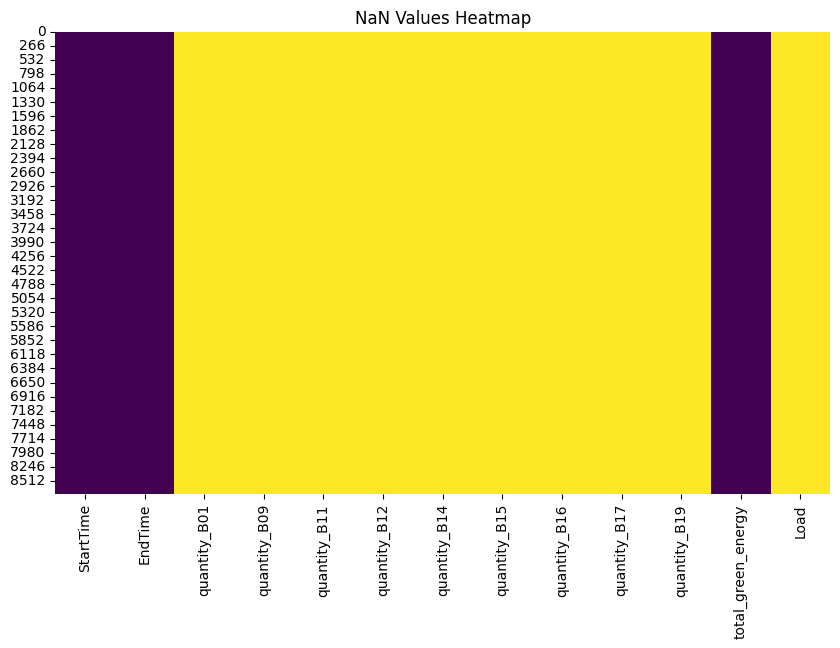

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = df_country_combined

# Plot NaN values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('NaN Values Heatmap')
plt.show()